In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#for some statistics
from scipy import stats
from scipy.stats import norm, skew 

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Model reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# Pipeline
from sklearn.base import TransformerMixin,BaseEstimator, RegressorMixin
from sklearn.pipeline import Pipeline

# Regressors 
from sklearn import linear_model
from sklearn.linear_model import Ridge, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# Model selection and validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

np.random.seed(123)
#The numpy.random.seed() makes the random numbers predictable and is used for reproducibility

In [3]:
#Reading the csv file and showing its shape along with first 5 rows
data = pd.read_csv('mer.csv')
data.head()

,Address,Postcode,KT1_KT2,Sale_price,Bedrooms,House_type,Freehold_leasehold,Res_new_old,Stationdist_miles,Sale_date,Sale_year,Sale_month,Latitude,Longitude,Easting,Northing,Ward,Altitude
0,"Flat 40, Elder House, 4, Water Lane",KT1 1AE,KT1,435000,2,Flat,Leasehold,Residential,0.4,05-Oct-15,2015,10,51.412605,-0.307355,517812,169535,Grove,9
1,"Flat 50, Elder House, 4, Water Lane",KT1 1AE,KT1,1295000,4,Flat,Leasehold,Residential,0.4,05-Feb-16,2016,2,51.412605,-0.307355,517812,169535,Grove,9
2,"Flat 35, Elder House, 4, Water Lane",KT1 1AE,KT1,550000,2,Flat,Leasehold,Residential,0.4,19-Oct-17,2017,10,51.412605,-0.307355,517812,169535,Grove,9
3,"Flat 47, Elder House, 4, Water Lane",KT1 1AE,KT1,550000,5,Flat,Leasehold,Residential,0.4,20-Apr-18,2018,4,51.412605,-0.307355,517812,169535,Grove,9
4,"Flat 1, Elder House, 4, Water Lane",KT1 1AE,KT1,143750,2,Flat,Leasehold,Residential,0.4,06-Oct-16,2016,10,51.412605,-0.307355,517812,169535,Grove,9


In [4]:
#check the numbers of samples and features
print("The train data size before dropping Id(Address) feature is : {} ".format(data.shape))

The train data size before dropping Id(Address) feature is : (3225, 18) 


In [5]:
#Save the 'Id' column
data_ID = data['Address']

#Removing the Id 
data = data.iloc[:,1::]

data.tail(5)

,Postcode,KT1_KT2,Sale_price,Bedrooms,House_type,Freehold_leasehold,Res_new_old,Stationdist_miles,Sale_date,Sale_year,Sale_month,Latitude,Longitude,Easting,Northing,Ward,Altitude
3220,KT2 7TU,KT2,350000,3,Flat,Leasehold,Residential,0.9,07-Dec-18,2018,12,51.421039,-0.280723,519642,170516,Coombe Hill,47
3221,KT2 7TW,KT2,330000,2,Flat,Leasehold,Residential,0.9,26-Feb-15,2015,2,51.418934,-0.282499,519524,170279,Coombe Hill,30
3222,KT2 7UA,KT2,240000,5,Flat,Leasehold,Residential,0.9,14-Sep-15,2015,9,51.413947,-0.285835,519305,169719,Canbury,18
3223,KT2 7UD,KT2,2650000,7,Detached,Freehold,Residential,0.9,17-Feb-17,2017,2,51.416814,-0.257641,521258,170084,Coombe Hill,40
3224,KT2 7XA,KT2,760000,2,Semi-Detached,Freehold,Residential,0.8,28-Sep-18,2018,9,51.415431,-0.257190,521293,169931,Coombe Hill,34


In [6]:
#check again the data size after dropping the 'Address' variable
print("\nThe train data size after dropping Id(Address) feature is : {} ".format(data.shape)) 


The train data size after dropping Id(Address) feature is : (3225, 17) 


In [7]:
#Removing the cell irrelevant for modelling and Sale_date splitted into months and year already
del data['Sale_date']
del data['Postcode']

In [8]:
data.tail(5)

,KT1_KT2,Sale_price,Bedrooms,House_type,Freehold_leasehold,Res_new_old,Stationdist_miles,Sale_year,Sale_month,Latitude,Longitude,Easting,Northing,Ward,Altitude
3220,KT2,350000,3,Flat,Leasehold,Residential,0.9,2018,12,51.421039,-0.280723,519642,170516,Coombe Hill,47
3221,KT2,330000,2,Flat,Leasehold,Residential,0.9,2015,2,51.418934,-0.282499,519524,170279,Coombe Hill,30
3222,KT2,240000,5,Flat,Leasehold,Residential,0.9,2015,9,51.413947,-0.285835,519305,169719,Canbury,18
3223,KT2,2650000,7,Detached,Freehold,Residential,0.9,2017,2,51.416814,-0.257641,521258,170084,Coombe Hill,40
3224,KT2,760000,2,Semi-Detached,Freehold,Residential,0.8,2018,9,51.415431,-0.257190,521293,169931,Coombe Hill,34


In [9]:
#transforming Sale_year and Sale_month into categorical variables
data['Sale_year'] =  data['Sale_year'].astype(str)
data['Sale_month'] =data['Sale_month'].astype(str)

# Outliers Removal


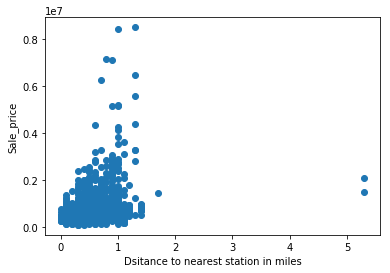

In [10]:
#Looking for outliers in station distance 
plt.scatter(x=data['Stationdist_miles'], y=data['Sale_price'])
plt.ylabel('Sale_price')
plt.xlabel('Dsitance to nearest station in miles')
plt.show()

In [11]:
data= data[data['Stationdist_miles'] < 4]

In [12]:
data.Stationdist_miles.describe()

count    3223.000000
mean        0.531430
std         0.279735
min         0.000000
25%         0.300000
50%         0.500000
75%         0.700000
max         1.700000
Name: Stationdist_miles, dtype: float64

In [13]:
data.Sale_price.describe()

count    3.223000e+03
mean     6.386975e+05
std      5.372017e+05
min      9.375000e+04
25%      3.600000e+05
50%      5.150000e+05
75%      7.600000e+05
max      8.500000e+06
Name: Sale_price, dtype: float64

In [14]:
#all numerical columns
data_numerical=data.select_dtypes( include=[np.number])
data_numerical.dtypes

Sale_price             int64
Bedrooms               int64
Stationdist_miles    float64
Latitude             float64
Longitude            float64
Easting                int64
Northing               int64
Altitude               int64
dtype: object

In [15]:
corr = data_numerical.corr()
print (corr['Sale_price'].sort_values(ascending=False)[:7], '\n')

Sale_price           1.000000
Bedrooms             0.487124
Altitude             0.317731
Longitude            0.299981
Easting              0.294572
Northing             0.250710
Stationdist_miles    0.245850
Name: Sale_price, dtype: float64 



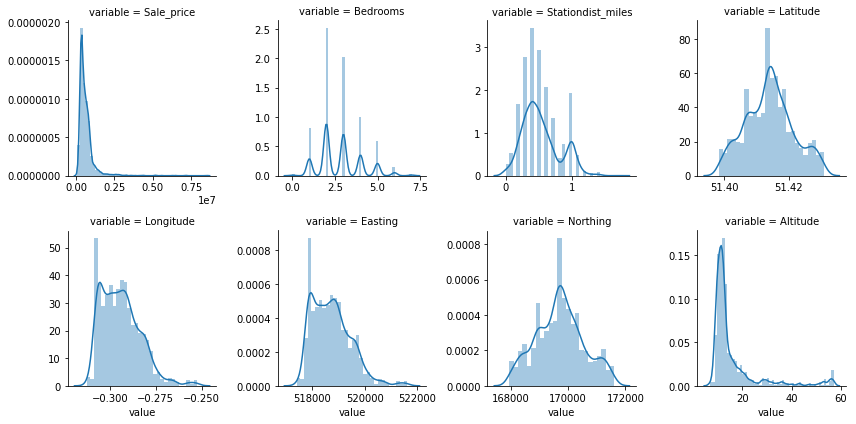

In [16]:
#create numeric plots
num = [f for f in data.columns if data.dtypes[f] != 'object']
nd = pd.melt(data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

##  Transform numeric features and remove their skewness

In [17]:
#get numeric features
numeric_feats = [f for f in data.columns if data.dtypes[f] != object]
numeric_feats.remove('Sale_price')


# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Altitude,2.694851
Longitude,0.837172
Easting,0.828448
Bedrooms,0.649109
Stationdist_miles,0.648856
Latitude,0.121103
Northing,0.100345


In [18]:
#get numeric features
numeric_feats = [f for f in data.columns if data.dtypes[f] != object]
numeric_feats.remove('Sale_price')

#log transform skewed numeric features:
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75].index
data[skewed_feats] = np.log1p(data[skewed_feats])


 mu = 638697.51 and sigma = 537118.35



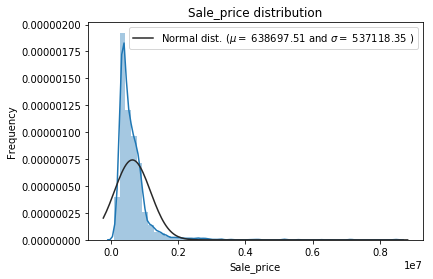

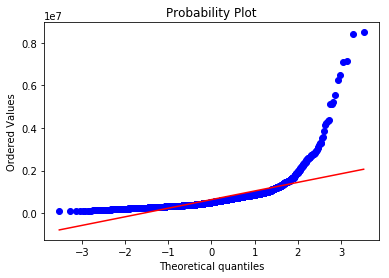

In [19]:
sns.distplot(data['Sale_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Sale_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Sale_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Sale_price'], plot=plt)
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data ,need to transform this variable and make it more normally distributed.

## Log Transformation of the Target Variable


 mu = 13.19 and sigma = 0.55



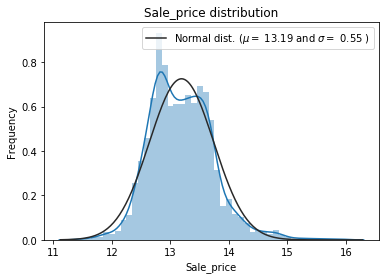

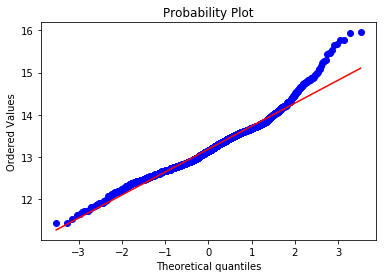

In [20]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
data["Sale_price"] = np.log1p(data["Sale_price"])

#Check the new distribution 
sns.distplot(data['Sale_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Sale_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Sale_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Sale_price'], plot=plt)
plt.show()

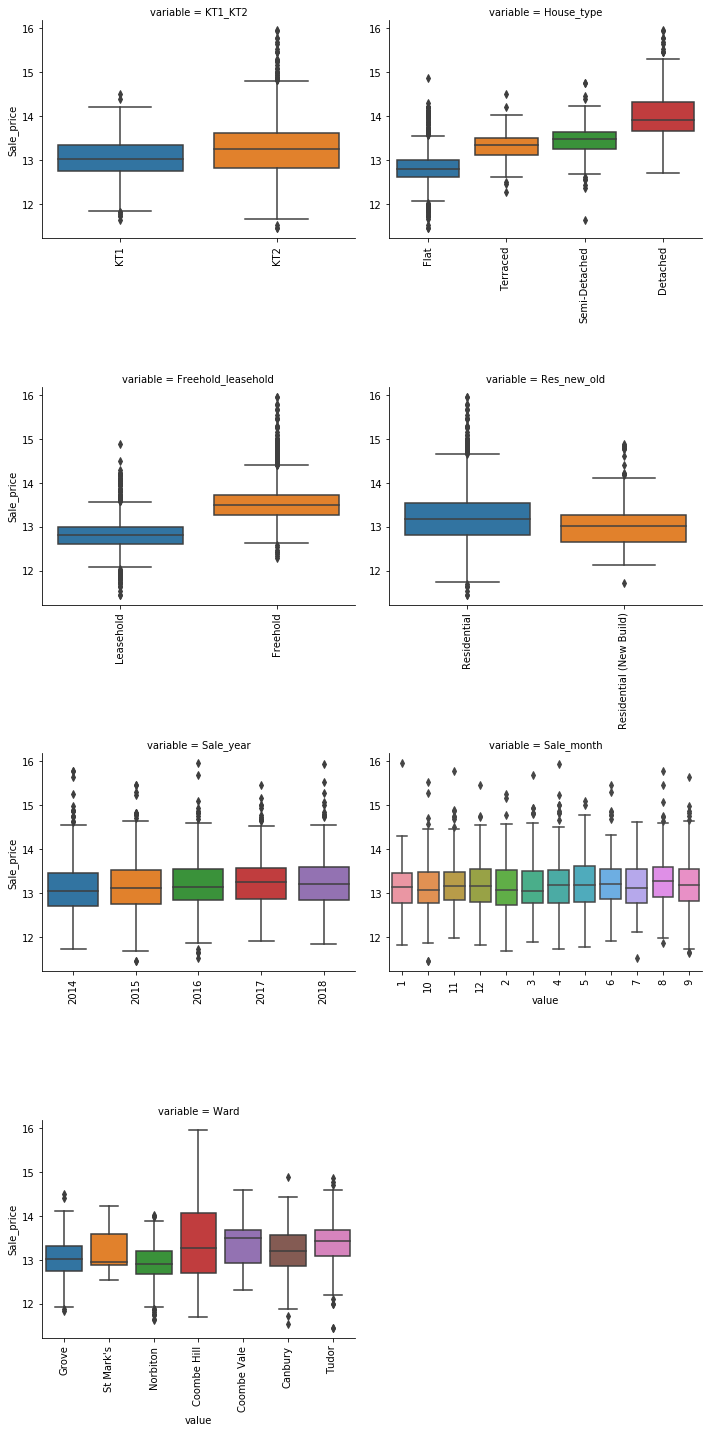

In [21]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in data.columns if data.dtypes[f] == 'object']

p = pd.melt(data, id_vars='Sale_price', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','Sale_price')
g

# Transforming and Feature Engineering

In [22]:
# Get one hot encoding of columns KT1_KT2
one_hot = pd.get_dummies(data['KT1_KT2'])
# Drop column KT1_KT2 as it is now encoded
data = data.drop('KT1_KT2',axis = 1)
# Join the encoded data
data = data.join(one_hot)

# Get one hot encoding of columns House_type
one_hot = pd.get_dummies(data['House_type'])
# Drop column House_type as it is now encoded
data = data.drop('House_type',axis = 1)
# Join the encoded data
data = data.join(one_hot)


# Get one hot encoding of columns Freehold_leasehold
one_hot = pd.get_dummies(data['Freehold_leasehold'])
# Drop column Freehold_leasehold as it is now encoded
data = data.drop('Freehold_leasehold',axis = 1)
# Join the encoded data
data = data.join(one_hot)

# Get one hot encoding of columns Res_new_old
one_hot = pd.get_dummies(data['Res_new_old'])
# Drop column Res_new_old as it is now encoded
data = data.drop('Res_new_old',axis = 1)
# Join the encoded data
data = data.join(one_hot)

# Get one hot encoding of columns Ward
one_hot = pd.get_dummies(data['Ward'])
# Drop column Ward as it is now encoded
data = data.drop('Ward',axis = 1)
# Join the encoded data
data = data.join(one_hot)


# Get one hot encoding of columns Sale_year
one_hot = pd.get_dummies(data['Sale_year'])
# Drop column Sale_year as it is now encoded
data = data.drop('Sale_year',axis = 1)
# Join the encoded data
data = data.join(one_hot)

data.head(5)

,Sale_price,Bedrooms,Stationdist_miles,Sale_month,Latitude,Longitude,Easting,Northing,Altitude,KT1,...,Coombe Vale,Grove,Norbiton,St Mark's,Tudor,2014,2015,2016,2017,2018
0,12.983104,2,0.4,10,51.412605,-0.367238,13.157369,169535,2.302585,1,...,0,1,0,0,0,0,1,0,0,0
1,14.074022,4,0.4,2,51.412605,-0.367238,13.157369,169535,2.302585,1,...,0,1,0,0,0,0,0,1,0,0
2,13.217675,2,0.4,10,51.412605,-0.367238,13.157369,169535,2.302585,1,...,0,1,0,0,0,0,0,0,1,0
3,13.217675,5,0.4,4,51.412605,-0.367238,13.157369,169535,2.302585,1,...,0,1,0,0,0,0,0,0,0,1
4,11.875838,2,0.4,10,51.412605,-0.367238,13.157369,169535,2.302585,1,...,0,1,0,0,0,0,0,1,0,0


In [23]:
data.shape

(3223, 31)

In [24]:
#columns with data type as object
data_object=data.select_dtypes(include=['object']).copy()
data_object.dtypes

Sale_month    object
dtype: object

In [25]:
#all numerical columns
data_numerical=data.select_dtypes( include=[np.number])
data_numerical.dtypes

Sale_price                 float64
Bedrooms                     int64
Stationdist_miles          float64
Latitude                   float64
Longitude                  float64
Easting                    float64
Northing                     int64
Altitude                   float64
KT1                          uint8
KT2                          uint8
Detached                     uint8
Flat                         uint8
Semi-Detached                uint8
Terraced                     uint8
Freehold                     uint8
Leasehold                    uint8
Residential                  uint8
Residential (New Build)      uint8
Canbury                      uint8
Coombe Hill                  uint8
Coombe Vale                  uint8
Grove                        uint8
Norbiton                     uint8
St Mark's                    uint8
Tudor                        uint8
2014                         uint8
2015                         uint8
2016                         uint8
2017                

In [26]:
data.Sale_price.describe()

count    3223.000000
mean       13.190386
std         0.549986
min        11.448398
25%        12.793862
50%        13.151924
75%        13.541075
max        15.955577
Name: Sale_price, dtype: float64

## Data Correlation

In [27]:
corr = data_numerical.corr()

print (corr['Sale_price'].sort_values(ascending=False)[:15], '\n')
print (corr['Sale_price'].sort_values(ascending=False)[-7:])

Sale_price           1.000000
Freehold             0.659066
Bedrooms             0.576059
Detached             0.548008
Northing             0.293081
Latitude             0.290122
Semi-Detached        0.269065
Stationdist_miles    0.252090
KT2                  0.195479
Longitude            0.183843
Easting              0.179506
Tudor                0.161851
Coombe Hill          0.146771
Altitude             0.126193
Terraced             0.100733
Name: Sale_price, dtype: float64 

Residential (New Build)   -0.052640
2014                      -0.075785
Grove                     -0.134843
Norbiton                  -0.193592
KT1                       -0.195479
Flat                      -0.652892
Leasehold                 -0.659066
Name: Sale_price, dtype: float64


# MODELLING

separate the features and the target variable for modeling<br>



In [28]:
y = data_numerical.Sale_price#transforms the y variable for the model
X = data_numerical.drop(['Sale_price'], axis=1)
# X denotes the set of predictor data, and y is the target variable.

In [29]:
#partitioning the data and to start modeling

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.2)

train_test_split() returns four objects:<br>

X_train is the subset of our features used for training.<br>
X_test is the subset which will be our 'hold-out' set - what we'll use to test the model.<br>
y_train is the target variable SalePrice which corresponds to X_train.<br>
y_test is the target variable SalePrice which corresponds to X_test.<br>

fit the model using X_train and y_train, and we'll score with X_test and y_test. The lr.fit() method will fit the linear regression on the features and target variable that we pass.

In [30]:
#linear model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [31]:

accuracies = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)
print(accuracies.mean())

0.6850616322844376


The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.

In [32]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.6504119248624326


In [33]:
predictions = model.predict(X_test)

In [34]:
#The RMSE measures the distance between our predicted values and actual values.
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.103851397603704


# Building a model with gradient boosting regressor


In [35]:
GBR=GradientBoostingRegressor()
model=GBR.fit(X_train,y_train)
print ("R^2 for test is: \n", model.score(X_test, y_test))
print("R^2")

R^2 for test is: 
 0.7839997085213248
R^2


In [36]:
predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.06416675438382902


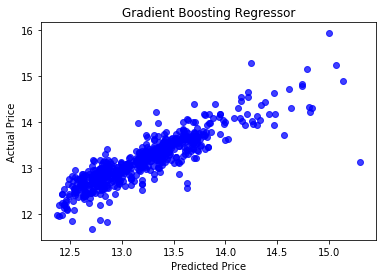

In [37]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Gradient Boosting Regressor')
plt.show()

In [38]:
print ("Feature Importances")
print (GBR.feature_importances_)

Feature Importances
[1.32751804e-01 3.70611020e-02 1.00527586e-01 1.46981350e-01
 1.38407675e-01 7.72998998e-02 8.22592764e-02 0.00000000e+00
 0.00000000e+00 4.06847702e-02 2.55369776e-02 1.54305961e-02
 6.28364780e-03 4.00467440e-02 4.77452718e-02 8.74104531e-03
 8.11191030e-03 0.00000000e+00 1.49024077e-03 0.00000000e+00
 2.52752833e-03 1.17639600e-02 6.13559174e-03 3.81025568e-03
 2.28193053e-02 1.33821022e-02 1.98736767e-02 1.03169690e-02
 1.07142023e-05]


In [40]:
# Calculate the feature ranking - Top 10 
importances = GBR.feature_importances_ 
indices = np.argsort(importances)[::-1] 

print("Top 10 Important Features\n")

for f in range(10): 
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]])) 

Top 10 Important Features

1. Longitude (0.146981)
2. Easting (0.138408)
3. Bedrooms (0.132752)
4. Latitude (0.100528)
5. Altitude (0.082259)
6. Northing (0.077300)
7. Leasehold (0.047745)
8. Detached (0.040685)
9. Freehold (0.040047)
10. Stationdist_miles (0.037061)


# Model parameter tuning with pipeline

In [41]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipeline = Pipeline(steps=[('regressor', Ridge())])


pipeline.fit(X_train, y_train)
print("model R2 score: %.3f" % pipeline.score(X_test, y_test))
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_test,pipeline.predict(X_test))))

kfold = 5
scoring = ['r2','neg_mean_squared_error']
results = cross_validate(pipeline, X, y, cv=kfold, return_train_score=True,scoring=scoring)

model R2 score: 0.629
RMSE: 0.332


In [42]:
pipeline = Pipeline(steps=[('regressor', KernelRidge())])


pipeline.fit(X_train, y_train)
print("model R2 score: %.3f" % pipeline.score(X_test, y_test))
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_test,pipeline.predict(X_test))))

kfold = 5
scoring = ['r2','neg_mean_squared_error']
results = cross_validate(pipeline, X, y, cv=kfold, return_train_score=True,scoring=scoring)

model R2 score: 0.630
RMSE: 0.332


In [43]:
pipeline = Pipeline(steps=[('regressor', RandomForestRegressor())])


pipeline.fit(X_train, y_train)
print("model R2 score: %.3f" % pipeline.score(X_test, y_test))
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_test,pipeline.predict(X_test))))

kfold = 5
scoring = ['r2','neg_mean_squared_error']
results = cross_validate(pipeline, X, y, cv=kfold, return_train_score=True,scoring=scoring)

model R2 score: 0.761
RMSE: 0.266


In [44]:
pipeline = Pipeline(steps=[('regressor', ElasticNet(alpha=0.05, l1_ratio=.9, random_state=3))])


pipeline.fit(X_train, y_train)
print("model R2 score: %.3f" % pipeline.score(X_test, y_test))
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_test,pipeline.predict(X_test))))

kfold = 5
scoring = ['r2','neg_mean_squared_error']
results = cross_validate(pipeline, X, y, cv=kfold, return_train_score=True,scoring=scoring)

model R2 score: 0.487
RMSE: 0.390


In [45]:
pipeline = Pipeline(steps=[('regressor', Lasso(alpha=0.1,max_iter=1000,tol=0.0001))])


pipeline.fit(X_train, y_train)
print("model R2 score: %.3f" % pipeline.score(X_test, y_test))
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_test,pipeline.predict(X_test))))

kfold = 5
scoring = ['r2','neg_mean_squared_error']
results = cross_validate(pipeline, X, y, cv=kfold, return_train_score=True,scoring=scoring)

model R2 score: 0.336
RMSE: 0.444


In [46]:
pipeline = Pipeline(steps=[('regressor', xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1))])


pipeline.fit(X_train, y_train)
print("model R2 score: %.3f" % pipeline.score(X_test, y_test))
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_test,pipeline.predict(X_test))))

kfold = 5
scoring = ['r2','neg_mean_squared_error']
results = cross_validate(pipeline, X, y, cv=kfold, return_train_score=True,scoring=scoring)

model R2 score: 0.802
RMSE: 0.242


In [47]:
pipeline = Pipeline(steps=[('regressor', GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5))])


pipeline.fit(X_train, y_train)
gbr_preds=pipeline.predict(X_test)
print("model R2 score: %.3f" % pipeline.score(X_test, y_test))
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_test,gbr_preds)))

kfold = 5
scoring = ['r2','neg_mean_squared_error']
results = cross_validate(pipeline, X, y, cv=kfold, return_train_score=True,scoring=scoring)

model R2 score: 0.808
RMSE: 0.239


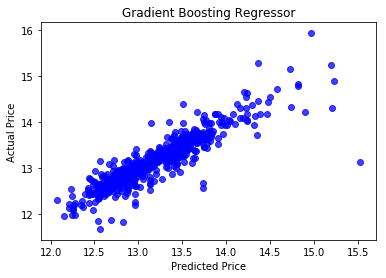

In [48]:
actual_values = y_test
plt.scatter(gbr_preds, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Gradient Boosting Regressor')
plt.show()

In [ ]:
results

## Submission

to create a csv that contains the predicted SalePrice for each observation in the data.csv dataset

In [ ]:
submission = pd.DataFrame()
submission['Address'] = data_ID